# Exploración de Datos

### Se importan las librerías y el archivo con los datos limpios

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
data = pd.read_csv('datos_limpios.csv')


C:\Users\arcem\AppData\Local\Temp\ipykernel_22376\927851972.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Imprimimos las estadísticas descriptivas 

In [3]:
# Estadísticas descriptivas
descripcion = data.describe()
print("Estadísticas descriptivas:")
print(descripcion)

Estadísticas descriptivas:
                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_1         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std   

### Se realizan las visualización de interés involucradas en la Pregunta de Negocio Descriptiva 

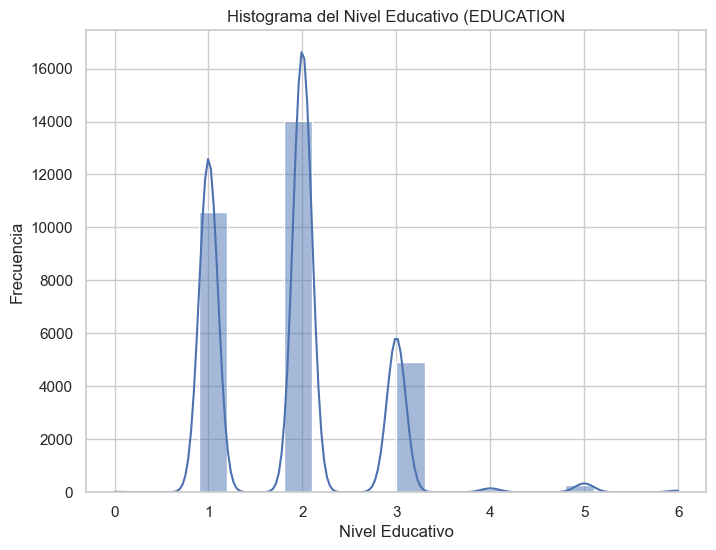

C:\Users\arcem\AppData\Local\Temp\ipykernel_22376\1197492819.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=default_prop_by_education, x='EDUCATION', y='default_payment_next_month', palette='pastel')


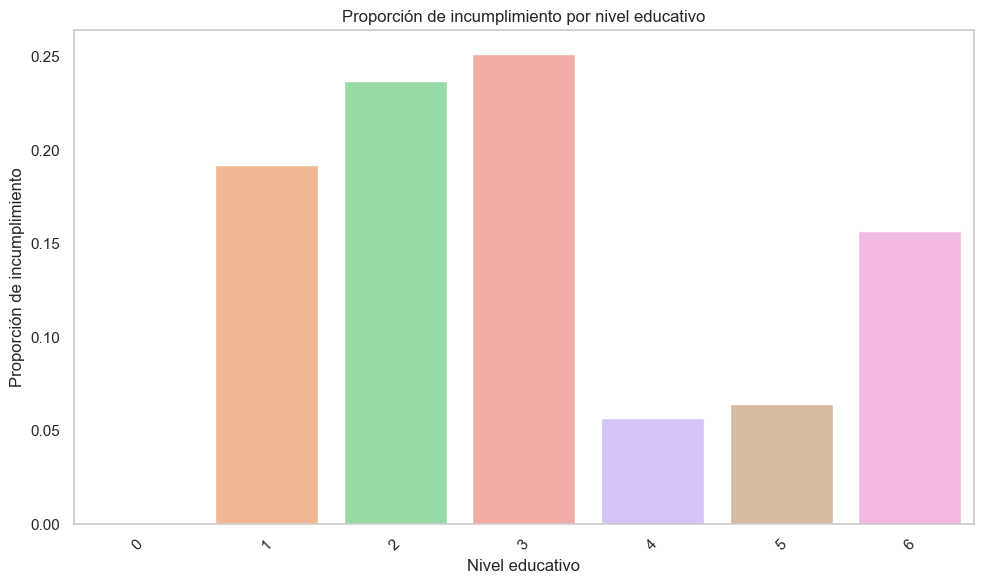

In [26]:
# Visualización del nivel educativo (EDUCATION)
plt.figure(figsize=(8, 6))
sns.histplot(data['EDUCATION'], bins=20, kde=True)
plt.title('Histograma del Nivel Educativo (EDUCATION')
plt.xlabel('Nivel Educativo')
plt.ylabel('Frecuencia')
plt.show()

# Agrupar los datos por nivel educativo y calcular la proporción de incumplimiento para cada grupo
default_prop_by_education = data.groupby('EDUCATION')['default_payment_next_month'].mean().reset_index()

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=default_prop_by_education, x='EDUCATION', y='default_payment_next_month', palette='pastel')

# Añadir etiquetas y título
plt.title('Proporción de incumplimiento por nivel educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Proporción de incumplimiento')
plt.xticks(rotation=45)  

# Mostrar la gráfica
plt.grid(axis='y')  
plt.tight_layout()  
plt.show()

Además se calculó el coeficiente de correlación de Spearman 

In [19]:
import pandas as pd
from scipy.stats import spearmanr

# Lista para almacenar las correlaciones
correlation_results = []

# Variables explicativas
variables_explicativas = ['EDUCATION','AGE']

# Calcular la correlación de Spearman para cada variable explicativa
for variable in variables_explicativas:
    correlation, _ = spearmanr(data[variable], data['default_payment_next_month'])
    correlation_results.append((variable, correlation))

# Convertir los resultados a un DataFrame para una fácil visualización
correlation_df = pd.DataFrame(correlation_results, columns=['Variable', 'Correlation'])

# Imprimir los resultados
print(correlation_df)

    Variable  Correlation
0  EDUCATION     0.044369
1        AGE     0.005149


### Se realizan las visualizaciones de interés involucradas en la Pregunta de Negocio Predictiva

Para lograr visualizaciones más simplificadas y organizadas decidimos trabajar con los promedios por factura de las variables de interés 

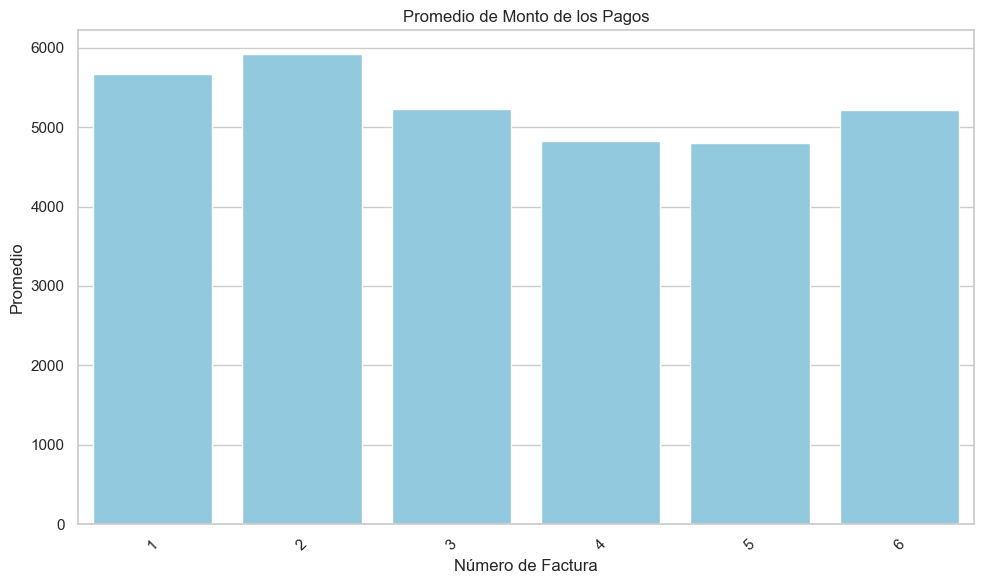

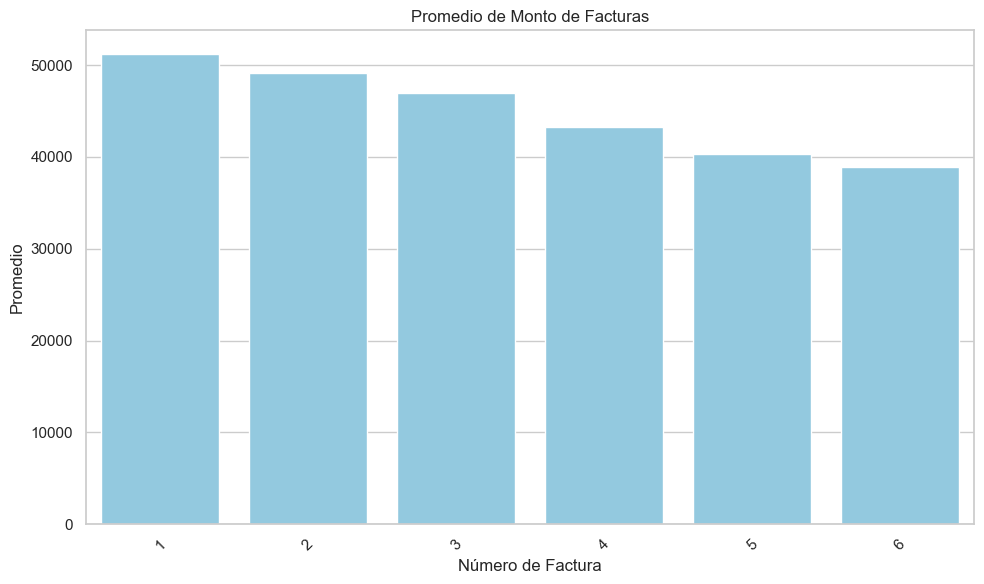

C:\Users\arcem\AppData\Local\Temp\ipykernel_22376\3819272500.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sns.barplot(x=[f'BILL_AMT{i}', f'PAY_AMT{i}'], y=[bill_means[i-1], pay_means[i-1]], ax=axes[i-1], palette='coolwarm')
C:\Users\arcem\AppData\Local\Temp\ipykernel_22376\3819272500.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[f'BILL_AMT{i}', f'PAY_AMT{i}'], y=[bill_means[i-1], pay_means[i-1]], ax=axes[i-1], palette='coolwarm')
C:\Users\arcem\AppData\Local\Temp\ipykernel_22376\3819272500.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as label

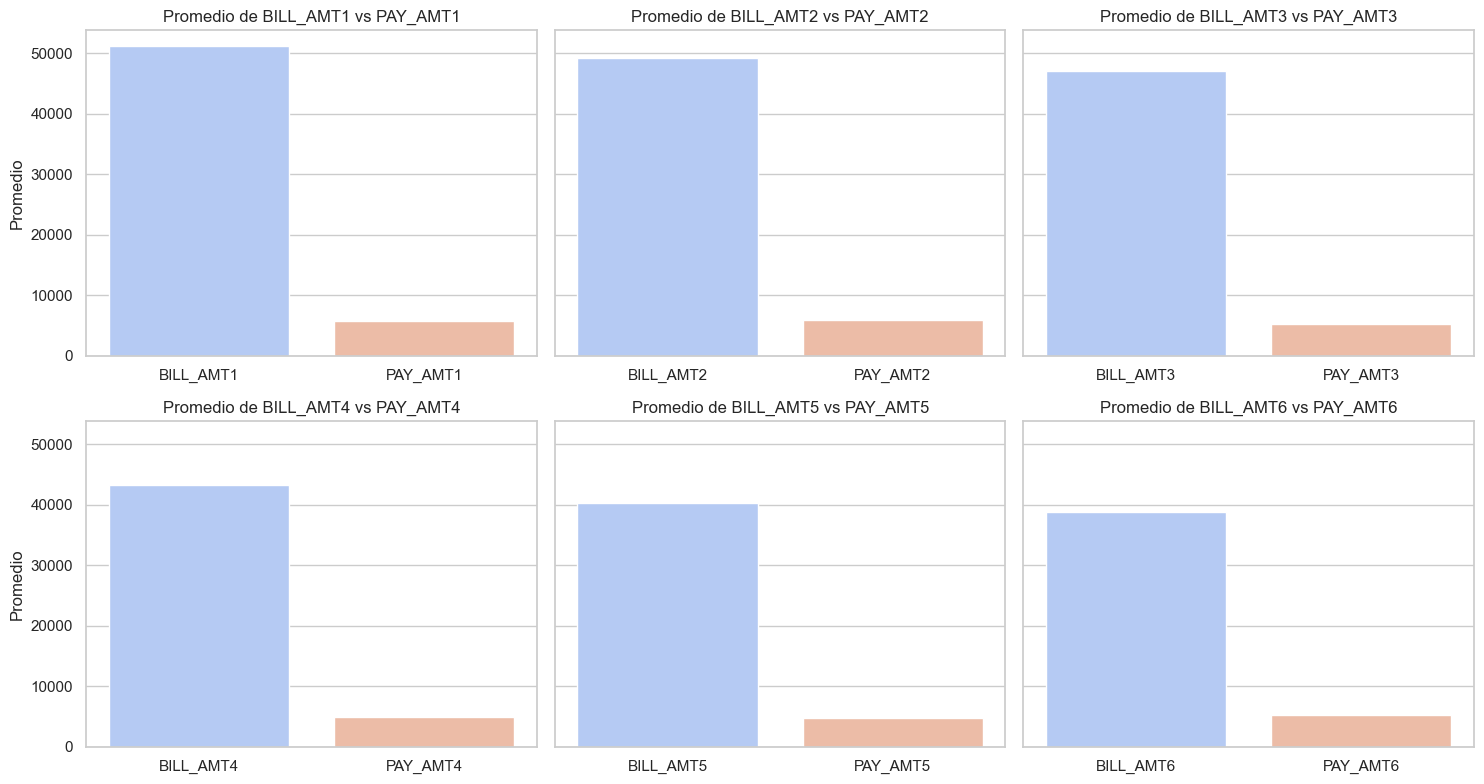

In [23]:
# Calcular promedios de las variables PAY_AMTX y BILL_AMTX
pay_means = data.filter(like='PAY_AMT').mean()
bill_means = data.filter(like='BILL_AMT').mean()

# Configurar estilo de seaborn
sns.set(style="whitegrid")

# Visualización del promedio del monto de los pagos (PAY_AMTX)
plt.figure(figsize=(10, 6))
sns.barplot(x=pay_means.index.str[-1], y=pay_means.values, color='skyblue')
plt.title('Promedio de Monto de los Pagos')
plt.xlabel('Número de Factura')
plt.ylabel('Promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualización del promedio del monto de las facturas (BILL_AMTX)
plt.figure(figsize=(10, 6))
sns.barplot(x=bill_means.index.str[-1], y=bill_means.values, color='skyblue')
plt.title('Promedio de Monto de Facturas')
plt.xlabel('Número de Factura')
plt.ylabel('Promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualización del promedio del monto de los pagos (PAY_AMTX) vs. Promedio del monto de las facturas (BILL_AMTX)
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharey=True)
axes = axes.flatten()
for i in range(1, 7):
    sns.barplot(x=[f'BILL_AMT{i}', f'PAY_AMT{i}'], y=[bill_means[i-1], pay_means[i-1]], ax=axes[i-1], palette='coolwarm')
    axes[i-1].set_title(f'Promedio de BILL_AMT{i} vs PAY_AMT{i}')
    axes[i-1].set_ylabel('Promedio')
plt.tight_layout()
plt.show()
